In [ ]:
# Graph 1
import networkx as nx
import pandas as pd
import json
from matplotlib.ticker import PercentFormatter
papers_file = open("./iis_papers.json", "r")
json_data = json.load(papers_file)
setz=set()
G=nx.Graph()
for author in json_data["papers"]:
    for paper in json_data["papers"][author]:
        if paper["name"] in setz:
            continue
        setz.add(paper["name"])
        authors = paper["authors"]
        authors = authors.split(",")
        authors = [i.strip() for i in authors]
        for x in range(len(authors)):
            for y in range(len(authors)):
                if x==y:
                    continue
                G.add_edge(authors[x],authors[y])

print(G)
# nx.draw(G)

Graph with 23730 nodes and 90399 edges


In [ ]:
# while True:
#     pass

In [ ]:
pip install guess_indian_gender

     |████████████████████████████████| 137 kB 31.3 MB/s 


In [ ]:
from guess_indian_gender import IndianGenderPredictor
i = IndianGenderPredictor()
for idx,node in enumerate(G.nodes()):
  # print(node)
  g=i.predict(name=node)
  G.nodes[node]["gender"]=g
print(G.nodes(data=True))

[('S Chatrchyan', {'gender': 'male'}), ('V Khachatryan', {'gender': 'male'}), ('AM Sirunyan', {'gender': 'male'}), ('A Tumasyan', {'gender': 'male'}), ('W Adam', {'gender': 'male'}), ('...', {'gender': 'male'}), ('SM Alam', {'gender': 'male'}), ('B Athar', {'gender': 'female'}), ('S Timm', {'gender': 'male'}), ('F Wappler', {'gender': 'male'}), ('L Zhichao', {'gender': 'male'}), ('H Ahmed', {'gender': 'male'}), ('G Aad', {'gender': 'male'}), ('B Abbott', {'gender': 'male'}), ('J Abdallah', {'gender': 'male'}), ('AA Abdelalim', {'gender': 'male'}), ('A Abdesselam', {'gender': 'female'}), ('B Abi', {'gender': 'male'}), ('M Aaboud', {'gender': 'male'}), ('B Abeloos', {'gender': 'male'}), ('OS AbouZeid', {'gender': 'male'}), ('R Aben', {'gender': 'male'}), ('T Bergauer', {'gender': 'male'}), ('E Asilar', {'gender': 'male'}), ('J Brandstetter', {'gender': 'male'}), ('M Abolins', {'gender': 'male'}), ('F Ambrogi', {'gender': 'male'}), ('D de Florian', {'gender': 'male'}), ('C Grojean', {'gen

In [ ]:
import numpy as np
from collections import Counter
min_degree_male = min([len(G[node]) for node in G.nodes() if G.nodes[node]["gender"]=="male"])
min_degree_female = min([len(G[node]) for node in G.nodes() if G.nodes[node]["gender"]=="female"])
max_degree_male = max([len(G[node]) for node in G.nodes() if G.nodes[node]["gender"]=="male"])
max_degree_female = max([len(G[node]) for node in G.nodes() if G.nodes[node]["gender"]=="female"])
mean_degree_male = np.mean([len(G[node]) for node in G.nodes() if G.nodes[node]["gender"]=="male"])
mean_degree_female = np.mean([len(G[node]) for node in G.nodes() if G.nodes[node]["gender"]=="female"])
print(min_degree_male, min_degree_female)
print(max_degree_male, max_degree_female)
print(mean_degree_male, mean_degree_female)

1 1
10398 500
7.763386362569806 6.329202808756712


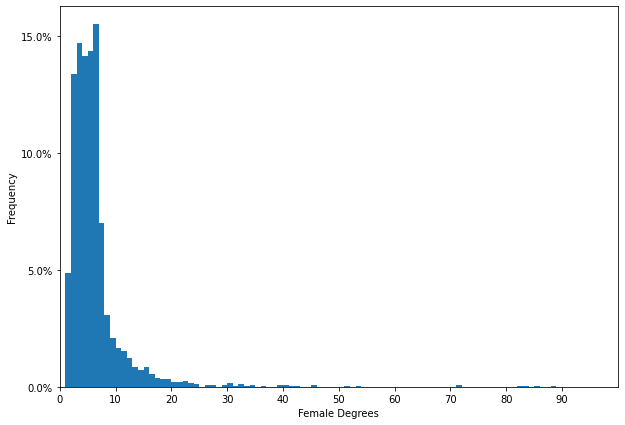

In [ ]:
from matplotlib import pyplot as plt 
male_degrees = [len(G[node]) for node in G.nodes() if G.nodes[node]["gender"]=="male"]
female_degrees = [len(G[node]) for node in G.nodes() if G.nodes[node]["gender"]=="female"]
fig,ax = plt.subplots(figsize=(10,7))
plt.xlabel("Female Degrees")
plt.ylabel("Frequency")
# ax.hist(female_degrees, bins=200)
ax.hist(female_degrees, bins=np.arange(0,100,1), weights=np.ones(len(female_degrees)) / len(female_degrees))
start, end = ax.get_ylim()
ax.set_xlim(0,100)
# print(start,end)
ax.yaxis.set_ticks(np.arange(start, end, 0.05))
ax.xaxis.set_ticks(np.arange(0,100,10))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

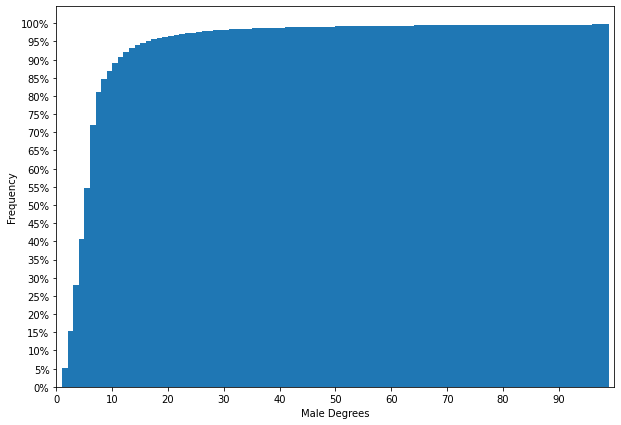

In [ ]:
fig,ax = plt.subplots(figsize=(10,7))
plt.xlabel("Male Degrees")
plt.ylabel("Frequency")
ax.hist(male_degrees, bins=np.arange(0,100,1), cumulative='true', weights=np.ones(len(male_degrees)) / len(male_degrees))
start, end = ax.get_ylim()
ax.set_xlim(0,100)
# print(start,end)
# start_x,end_x = ax.get_xlim()
ax.yaxis.set_ticks(np.arange(start, end, 0.05))
ax.xaxis.set_ticks(np.arange(0,100,10))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

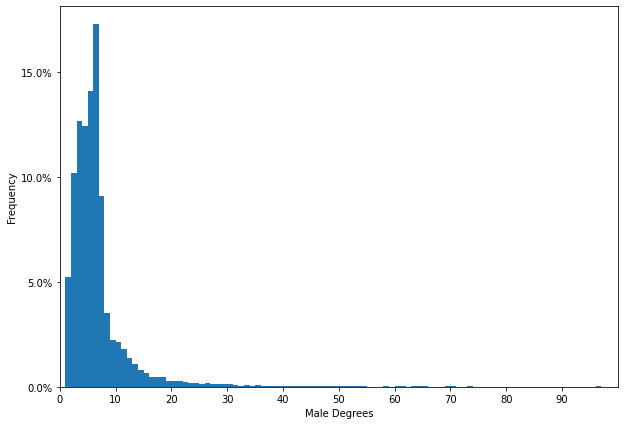

In [ ]:
fig,ax = plt.subplots(figsize=(10,7))
plt.xlabel("Male Degrees")
plt.ylabel("Frequency")
ax.hist(male_degrees, bins=np.arange(0,100,1), weights=np.ones(len(male_degrees)) / len(male_degrees))
start, end = ax.get_ylim()
ax.set_xlim(0,100)
# print(start,end)
# start_x,end_x = ax.get_xlim()
ax.yaxis.set_ticks(np.arange(start, end, 0.05))
ax.xaxis.set_ticks(np.arange(0,100,10))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

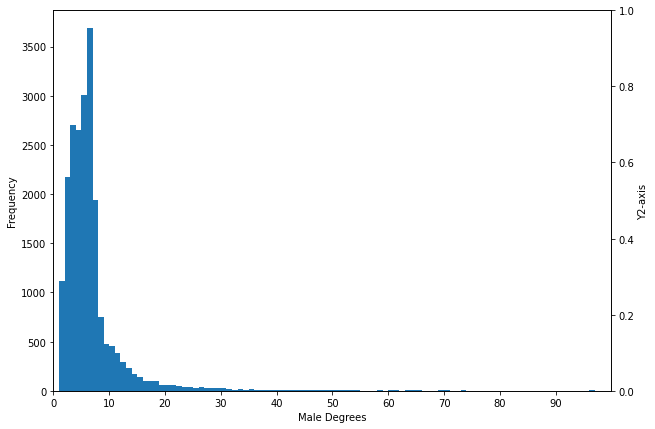

In [ ]:
fig,ax = plt.subplots(figsize=(10,7))
plt.xlabel("Male Degrees")
plt.ylabel("Frequency")
ax.hist(male_degrees, bins=np.arange(0,100,1))
start, end = ax.get_ylim()
ax.set_xlim(0,100)
ax2 = ax.twinx()
ax2.set_ylabel('Y2-axis')
# print(start,end)
# start_x,end_x = ax.get_xlim()
# ax.yaxis.set_ticks(np.arange(start, end, 0.05))
ax.xaxis.set_ticks(np.arange(0,100,10))
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

In [ ]:
print(len(female_degrees))
print(len(male_degrees))


2421
21309


In [ ]:
eig = nx.clustering(G)

CLUSTERING COEFFICIENTS FEMALES


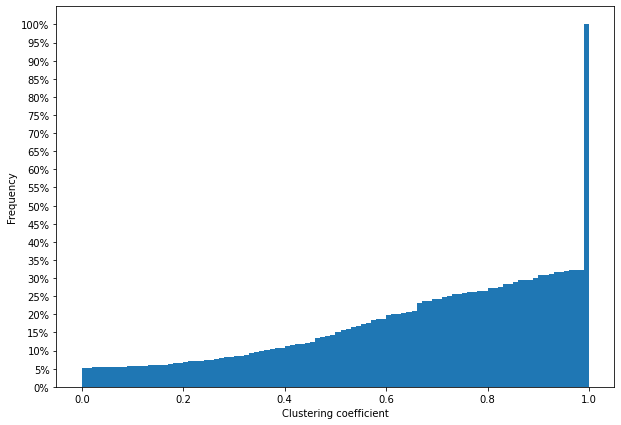

In [ ]:
from matplotlib.ticker import PercentFormatter
import numpy as np
from matplotlib import pyplot as plt
min_val = 100000
max_val=-1
# sum=0
male_centralities=[]
female_centralities=[]
for node in eig:
  if G.nodes[node]["gender"]=="female":
    female_centralities.append(eig[node])
  else:
    male_centralities.append(eig[node])

# avg_val=sum/len(eig)
# male_centralities = [i/len(male_centralities) for i in male_centralities]
# female_centralities = [i/len(female_centralities) for i in female_centralities]
print("CLUSTERING COEFFICIENTS FEMALES")
fig,ax = plt.subplots(figsize=(10,7 ))
plt.xlabel("Clustering coefficient")
plt.ylabel("Frequency")
ax.hist(female_centralities, bins=100, cumulative='true',weights=np.ones(len(female_centralities)) / len(female_centralities))
start, end = ax.get_ylim()
# print(start,end)
ax.yaxis.set_ticks(np.arange(start, end, 0.05))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

CLUSTERING COEFFICIENTS MALES


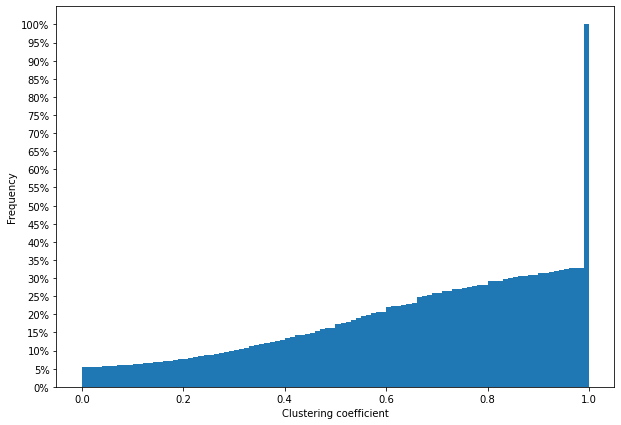

In [ ]:
print("CLUSTERING COEFFICIENTS MALES")
fig,ax = plt.subplots(figsize=(10,7))
plt.xlabel("Clustering coefficient")
plt.ylabel("Frequency")
ax.hist(male_centralities, bins=100,cumulative = 'true', weights=np.ones(len(male_centralities)) / len(male_centralities))
start, end = ax.get_ylim()
# print(start,end)
ax.yaxis.set_ticks(np.arange(start, end, 0.05))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

In [ ]:
femali_avg_clustering = np.mean(female_centralities)
mali_avg_clustering = np.mean(male_centralities)
print(femali_avg_clustering, mali_avg_clustering)

0.8351054180028683 0.821310085505822


In [ ]:
# eig = nx.betweenness_centrality(G)

In [ ]:
# from matplotlib.ticker import PercentFormatter
# import numpy as np
# from matplotlib import pyplot as plt
# min_val = 100000
# max_val=-1
# # sum=0
# male_centralities=[]
# female_centralities=[]
# for node in eig:
#   if G.nodes[node]["gender"]=="female":
#     female_centralities.append(eig[node])
#   else:
#     male_centralities.append(eig[node])

# # avg_val=sum/len(eig)
# # male_centralities = [i/len(male_centralities) for i in male_centralities]
# # female_centralities = [i/len(female_centralities) for i in female_centralities]
# print("BETWEENNESS CENTRALITY FEMALES")
# fig,ax = plt.subplots(figsize=(20,20))
# plt.xlabel("Betweenness centrality")
# plt.ylabel("Frequency")
# ax.hist(female_centralities, bins=100)

In [ ]:
# print("BETWEENNESS CENTRALITY MALES")
# fig,ax = plt.subplots(figsize=(20,20))
# plt.xlabel("Clustering coefficient")
# plt.ylabel("Frequency")
# ax.hist(male_centralities, bins=100)

In [ ]:
# femali_avg_clustering = np.mean(female_centralities)
# mali_avg_clustering = np.mean(male_centralities)
# print(femali_avg_clustering, mali_avg_clustering)

# **betweenness and closeness using loaded pkl file**

In [ ]:
import pickle
file = open('betweenness.pkl', 'rb')
between_file = pickle.load(file)
file.close()


BETWEENNESS CENTRALITY FEMALES


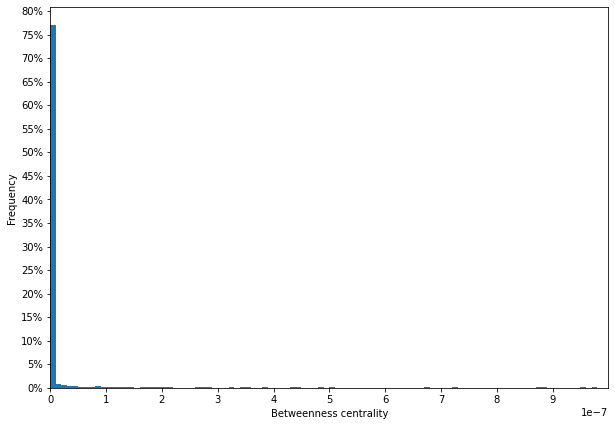

In [ ]:
from matplotlib.ticker import PercentFormatter
import numpy as np
from matplotlib import pyplot as plt
min_val = 100000
max_val=-1
# sum=0
male_centralities=[]
female_centralities=[]
for node in between_file:
  if G.nodes[node]["gender"]=="female":
    female_centralities.append(between_file[node])
  else:
    male_centralities.append(between_file[node])

# avg_val=sum/len(eig)
# male_centralities = [i/len(male_centralities) for i in male_centralities]
# female_centralities = [i/len(female_centralities) for i in female_centralities]
print("BETWEENNESS CENTRALITY FEMALES")
fig,ax = plt.subplots(figsize=(10,7))
plt.xlabel("Betweenness centrality")
plt.ylabel("Frequency")
ax.hist(female_centralities, bins=np.arange(0,0.000001,0.00000001), weights=np.ones(len(female_centralities)) / len(female_centralities))
start, end = ax.get_ylim()
ax.set_xlim(0,0.000001)
# print(start,end)
ax.yaxis.set_ticks(np.arange(start, end, 0.05))
ax.xaxis.set_ticks(np.arange(0,0.000001,0.0000001))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()




BETWEENNESS CENTRALITY MALES


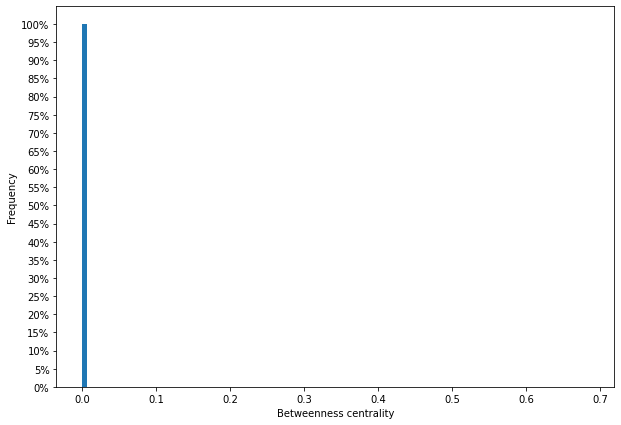

In [ ]:
print("BETWEENNESS CENTRALITY MALES")
fig,ax = plt.subplots(figsize=(10,7))
plt.xlabel("Betweenness centrality")
plt.ylabel("Frequency")
ax.hist(male_centralities, bins=100, weights=np.ones(len(male_centralities)) / len(male_centralities))
start, end = ax.get_ylim()
# print(start,end)
ax.yaxis.set_ticks(np.arange(start, end, 0.05))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [ ]:
femali_avg_clustering = np.mean(female_centralities)
mali_avg_clustering = np.mean(male_centralities)
print(femali_avg_clustering, mali_avg_clustering)

3.5339136523498895e-05 8.63765183660799e-05


In [ ]:
import pickle
file = open('closeness.pkl', 'rb')
close_file = pickle.load(file)
file.close()

Closeness CENTRALITY FEMALES


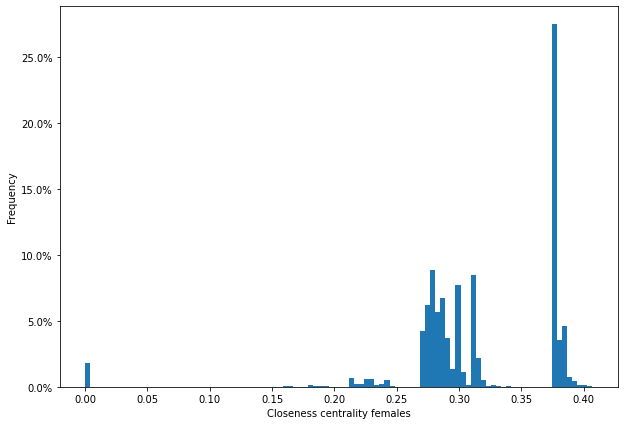

In [ ]:
from matplotlib.ticker import PercentFormatter
import numpy as np
from matplotlib import pyplot as plt
min_val = 100000
max_val=-1
# sum=0
male_centralities=[]
female_centralities=[]
for node in close_file:
  if G.nodes[node]["gender"]=="female":
    female_centralities.append(close_file[node])
  else:
    male_centralities.append(close_file[node])

# avg_val=sum/len(eig)
# male_centralities = [i/len(male_centralities) for i in male_centralities]
# female_centralities = [i/len(female_centralities) for i in female_centralities]
print("Closeness CENTRALITY FEMALES")
fig,ax = plt.subplots(figsize=(10,7))
plt.xlabel("Closeness centrality females")
plt.ylabel("Frequency")
ax.hist(female_centralities, bins=100, weights=np.ones(len(female_centralities)) / len(female_centralities))
start, end = ax.get_ylim()
# print(start,end)
ax.yaxis.set_ticks(np.arange(start, end, 0.05)) # put start end here to get cropped graph(zoomed in)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()




Closeness CENTRALITY MALES


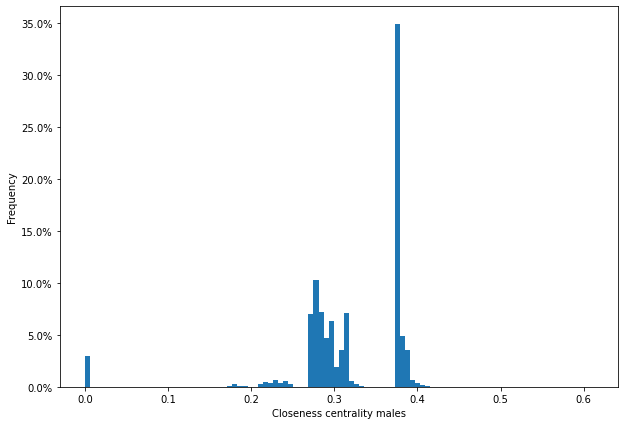

In [ ]:
print("Closeness CENTRALITY MALES")
fig,ax = plt.subplots(figsize=(10,7))
plt.xlabel("Closeness centrality males")
plt.ylabel("Frequency")
ax.hist(male_centralities, bins=100, weights=np.ones(len(male_centralities)) / len(male_centralities))
start, end = ax.get_ylim()
# print(start,end)
ax.yaxis.set_ticks(np.arange(start, end, 0.05)) # put start, end to get zoomed in graph
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [ ]:
femali_avg_clustering = np.mean(female_centralities)
mali_avg_clustering = np.mean(male_centralities)
print(femali_avg_clustering, mali_avg_clustering)

0.3152491056790309 0.31868755139602517


In [ ]:
import pickle
file = open('LCC.pkl', 'rb')
LCC_file = pickle.load(file)
file.close()



In [ ]:
male_LCC = 0
female_LCC = 0
for node in LCC_file:
    if G.nodes[node]['gender'] == 'male':
        male_LCC += 1
    else:
        female_LCC += 1
print(male_LCC, female_LCC)

20685 2378


In [ ]:
import pickle
file = open('partitions.pkl', 'rb')
partitions_file = pickle.load(file)
file.close()

In [ ]:
# list(set(list(partitions_file.values())))
part_dic = dict()
for key,value in partitions_file.items():
    if value not in list(part_dic.keys()):
        part_dic[value] = []
    part_dic[value].append(key)

total_no_com = max(list(partitions_file.values()))


In [ ]:
part_dic_gen = dict()
part_gen_list = []
fem_per = []
total = []
for key,value in part_dic.items():
    # print("Community: ",key)
    male = 0
    female = 0
    for name in value:
        if G.nodes[name]['gender'] == 'male':
            male += 1 
        else:
            female += 1
    # print("Male: ",male," Female: ",female)
    fem_per.append((female/(female+male), (female+male))) # female+male = len(value)
    final = sorted(fem_per, key = lambda x:x[1])

    part_dic_gen[key] = {"male":male,"female":female}
    part_gen_list.append((key,male,female))



part_gen_list = sorted(part_gen_list, key = lambda x:x[0])


final_community_list = []
final_male = []
final_female = []
for i in part_gen_list:
    final_community_list.append(i[0])
    final_male.append(i[1])
    final_female.append(i[2])

In [ ]:
for i in final:
    if i[0]>0.15:
        print(i[0])
        print("No of members :",i[1])

0.5
No of members : 2
0.5
No of members : 2
0.5
No of members : 2
0.5
No of members : 2
0.5
No of members : 2
0.5
No of members : 2
0.5
No of members : 2
0.5
No of members : 2
0.5
No of members : 2
0.3333333333333333
No of members : 3
0.6666666666666666
No of members : 3
0.3333333333333333
No of members : 3
0.3333333333333333
No of members : 3
0.3333333333333333
No of members : 3
1.0
No of members : 3
0.6666666666666666
No of members : 3
0.3333333333333333
No of members : 3
0.3333333333333333
No of members : 3
0.3333333333333333
No of members : 3
0.3333333333333333
No of members : 3
0.25
No of members : 4
0.25
No of members : 4
0.25
No of members : 4
0.25
No of members : 4
0.25
No of members : 4
0.25
No of members : 4
0.25
No of members : 4
0.25
No of members : 4
0.2
No of members : 5
0.2
No of members : 5
0.16666666666666666
No of members : 6
0.16666666666666666
No of members : 6
0.16666666666666666
No of members : 6
0.2222222222222222
No of members : 9
0.21428571428571427
No of membe

In [ ]:
final_male_per = []
final_female_per = []
for i in range(len(final_community_list)):
    final_male_per.append(final_male[i]/(final_male[i]+final_female[i]))
    final_female_per.append(final_female[i]/(final_male[i]+final_female[i]))


In [ ]:
final_male_norm = []
final_female_norm = []
maximale = max(final_male)
maxifemale = max(final_female)
minimale = min(final_male)
minifemale = min(final_female)
for i in range(len(final_community_list)):
    final_male_norm.append((final_male[i]-minimale)/(maximale-minimale))
    final_female_norm.append((final_female[i]-minifemale)/(maxifemale - minifemale))


In [ ]:
final_male_per_whole = []
final_female_per_whole = []
sum_male = sum(final_male)
sum_female = sum(final_female)
for i in range(len(final_community_list)):
    final_male_per_whole.append(final_male[i]/sum_male)
    final_female_per_whole.append(final_female[i]/sum_female)

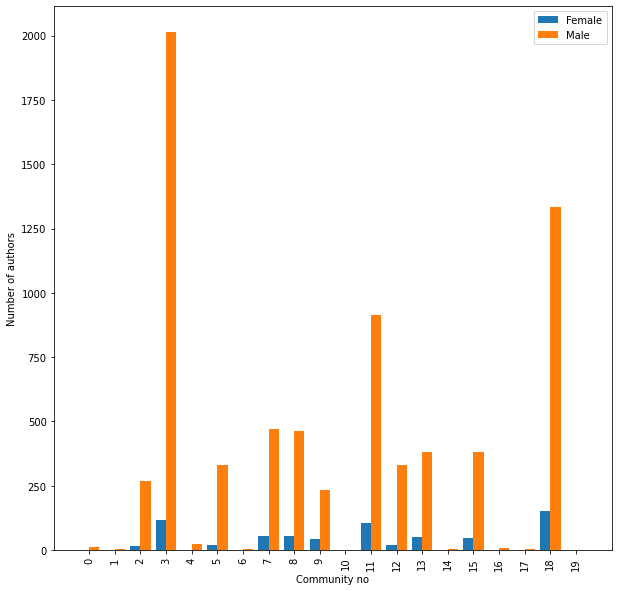

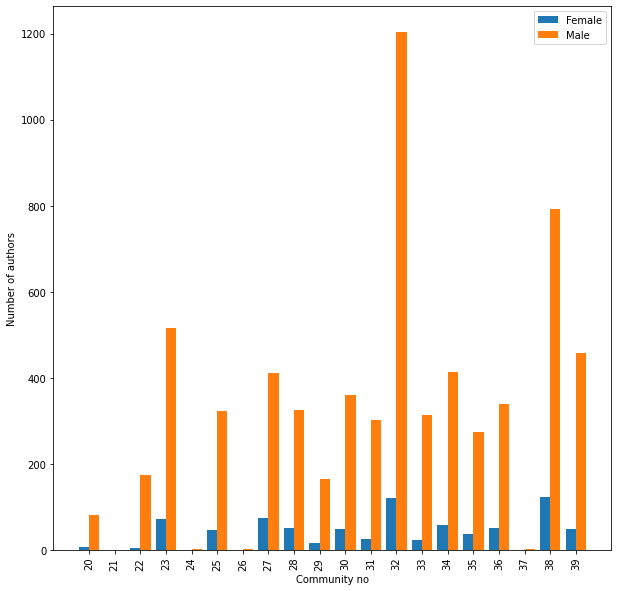

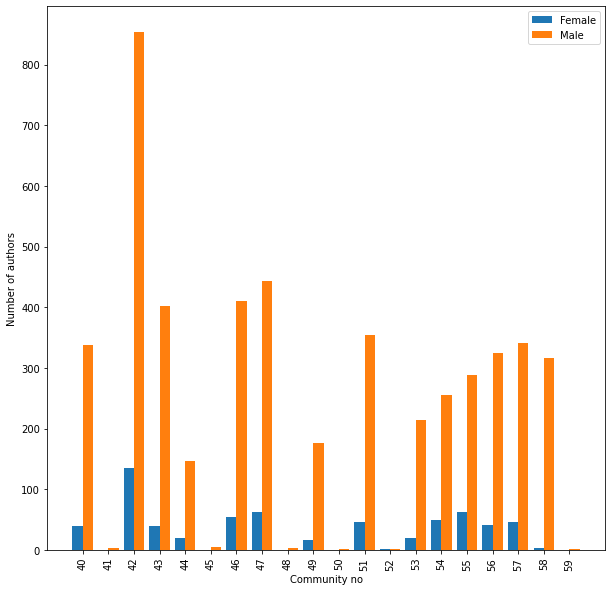

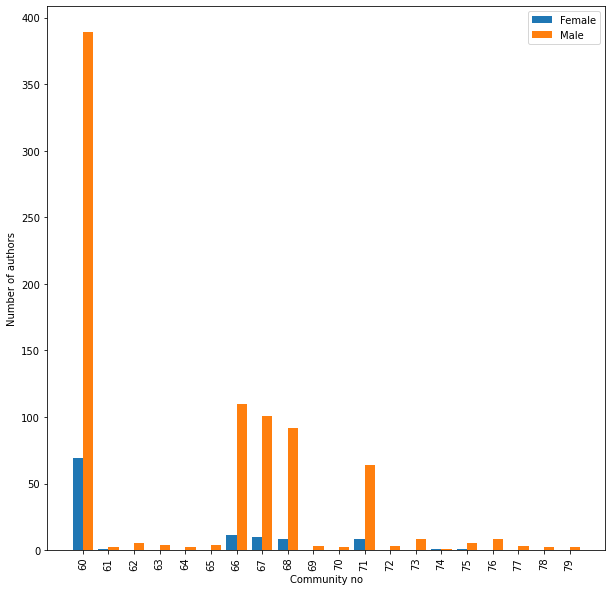

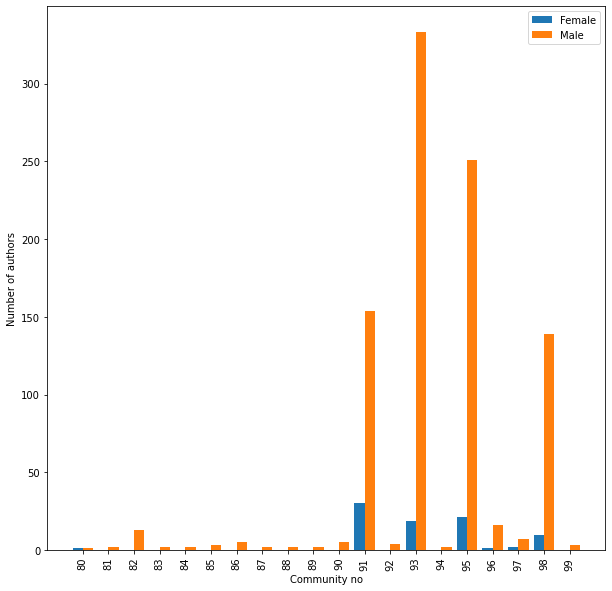

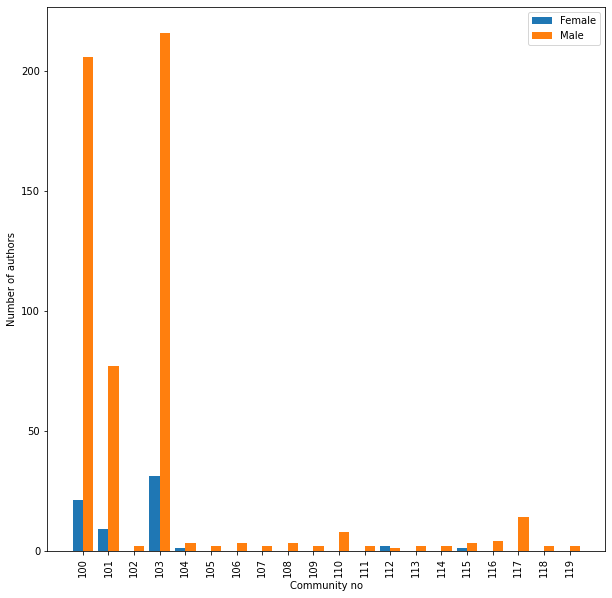

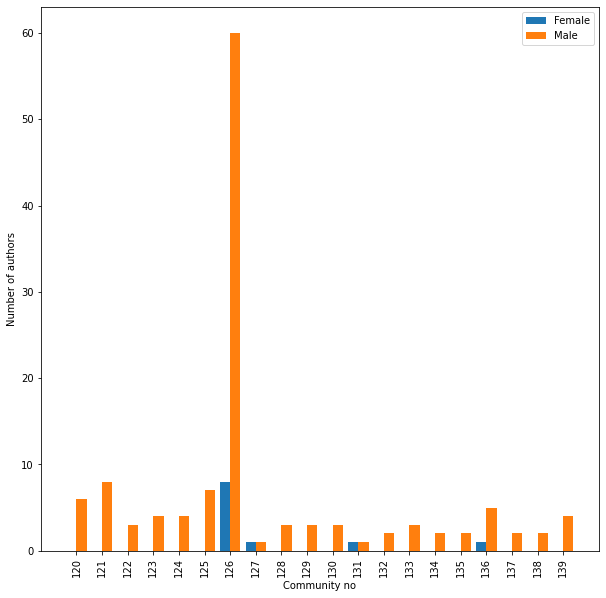

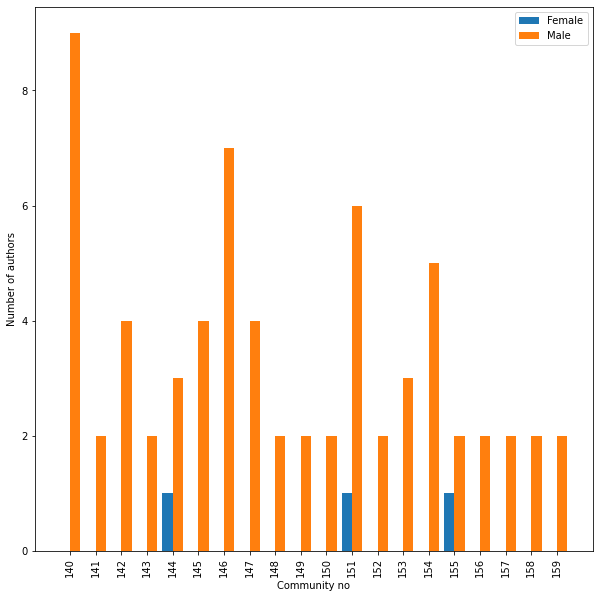

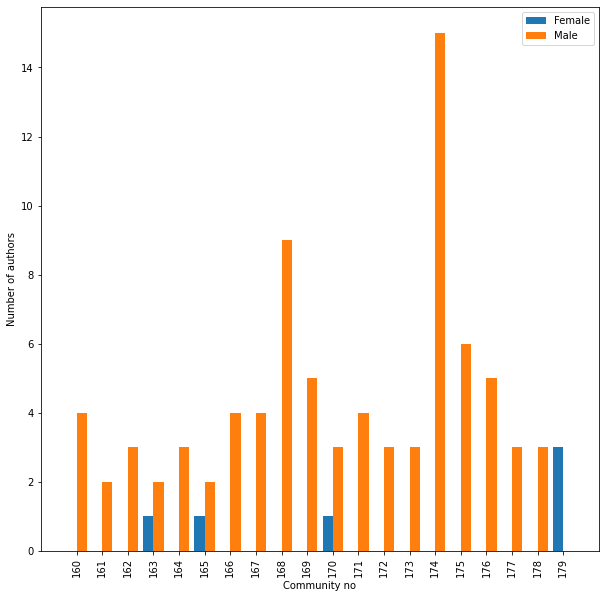

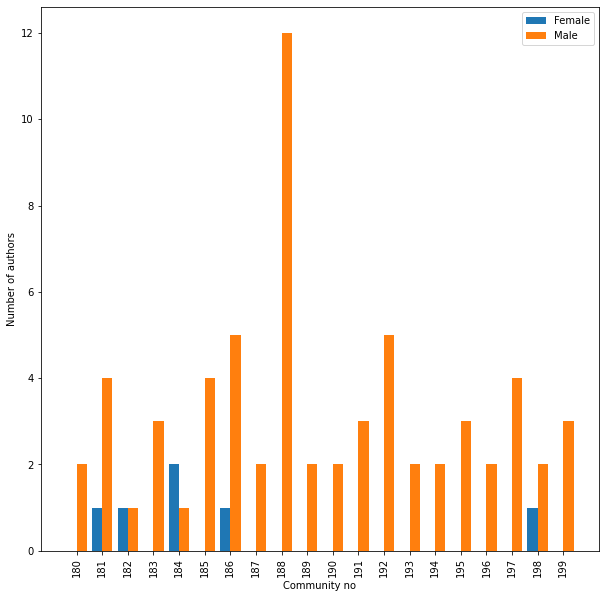

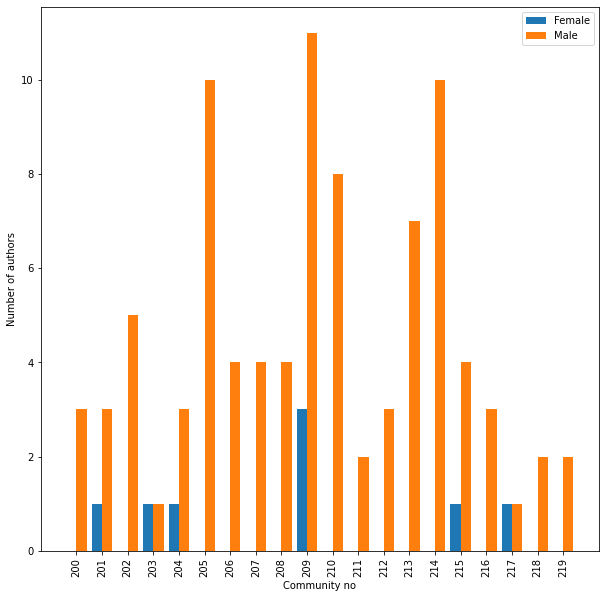

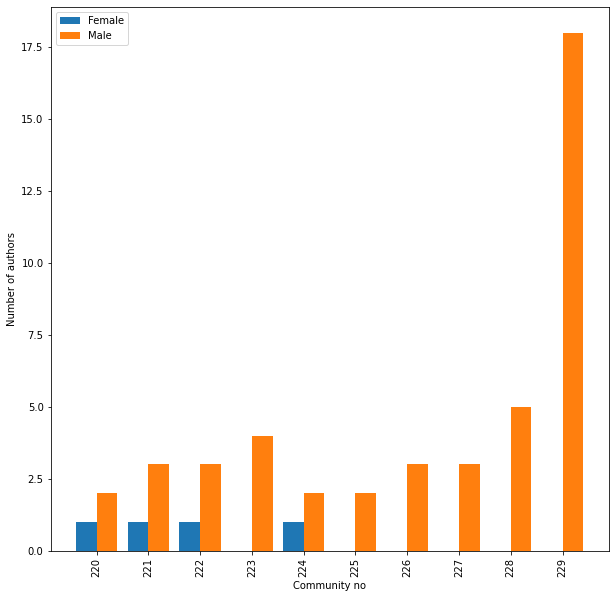

In [ ]:
import numpy as np 


for i in range(0,total_no_com,20):

    if i+20>total_no_com+1:
        offset = total_no_com +1 -i
    else:
        offset = 20
    X_axis = np.arange(i,i+offset)

    plt.figure(figsize=(10, 10))
    plt.bar(X_axis - 0.2, final_female[i:i+offset], 0.4, label = 'Female')
    plt.bar(X_axis + 0.2, final_male[i:i+offset], 0.4, label = 'Male')
    
    plt.xticks(X_axis, final_community_list[i:i+offset],rotation = 'vertical')
    plt.xlabel("Community no")
    plt.ylabel("Number of authors")
    # plt.title("Number of Students in each group")
    plt.legend()

    plt.show()

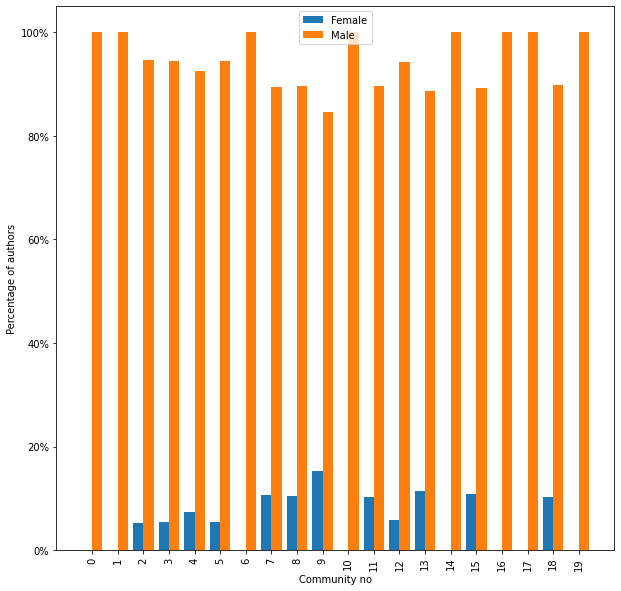

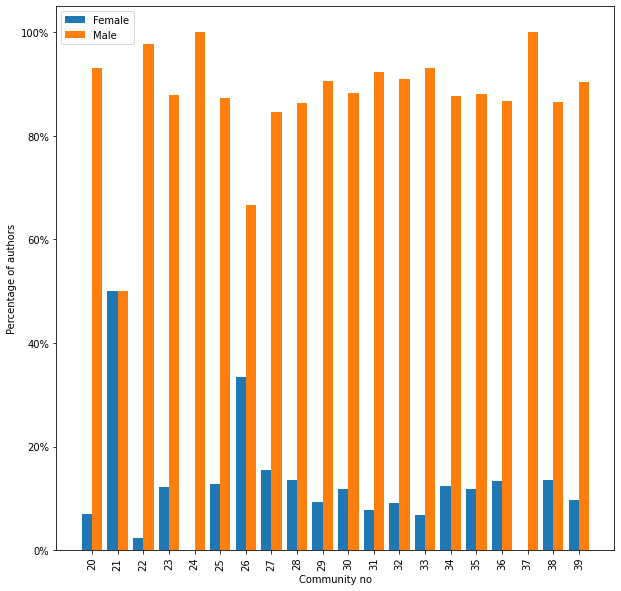

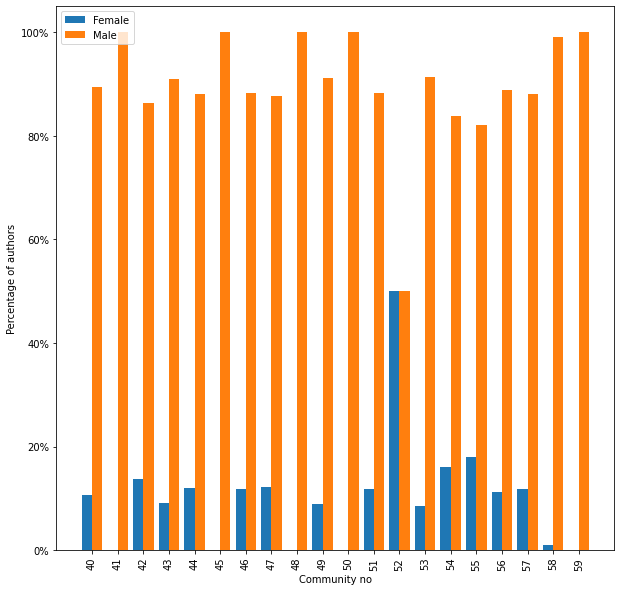

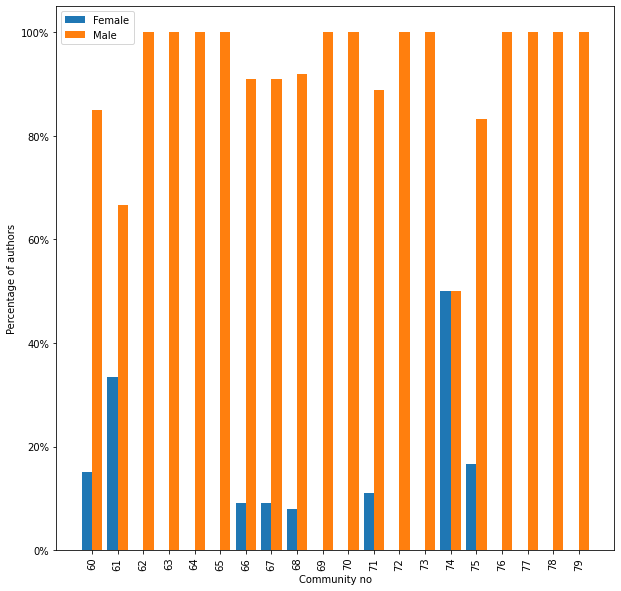

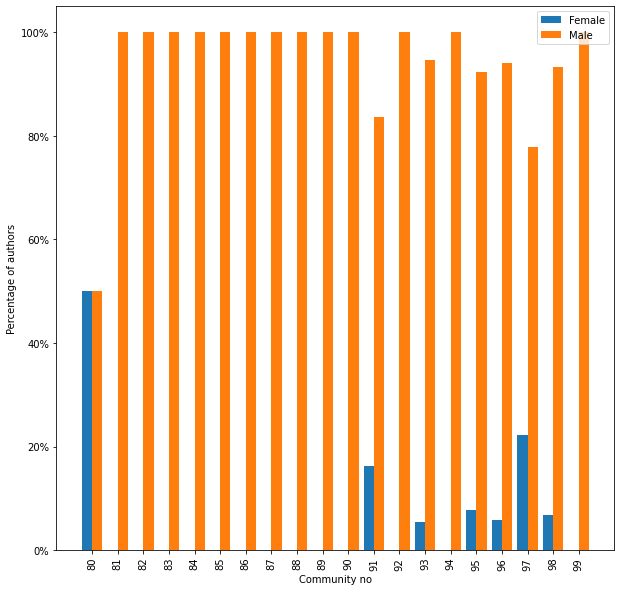

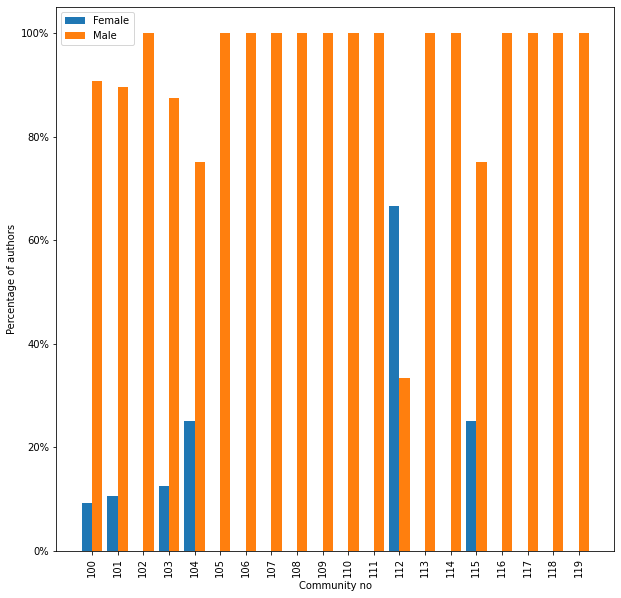

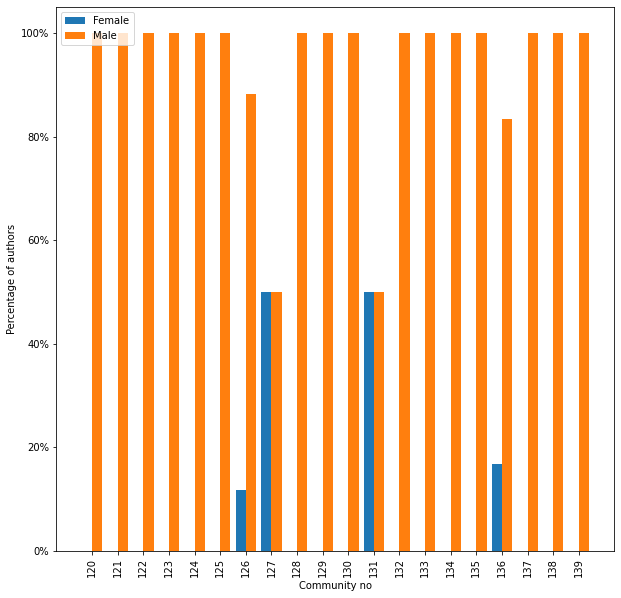

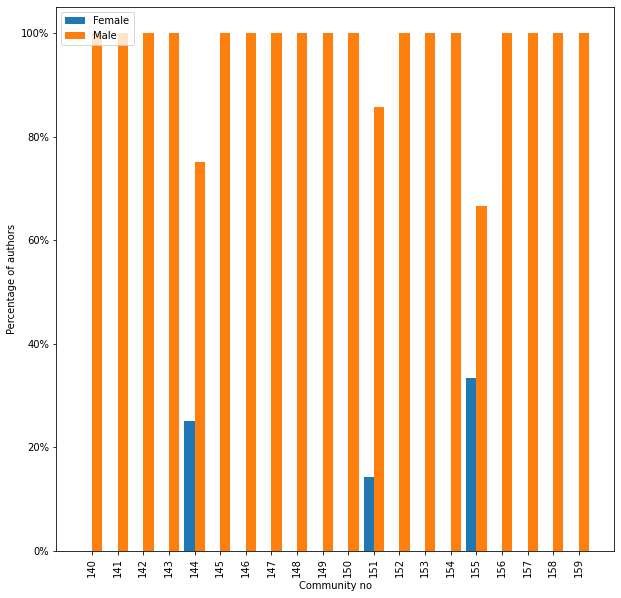

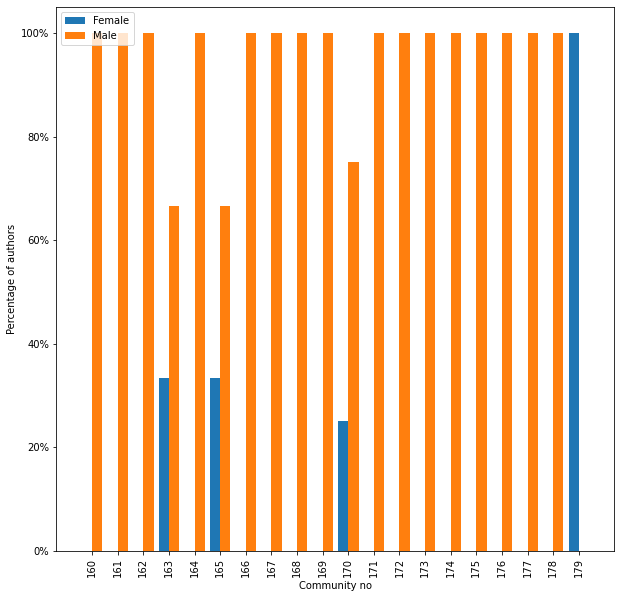

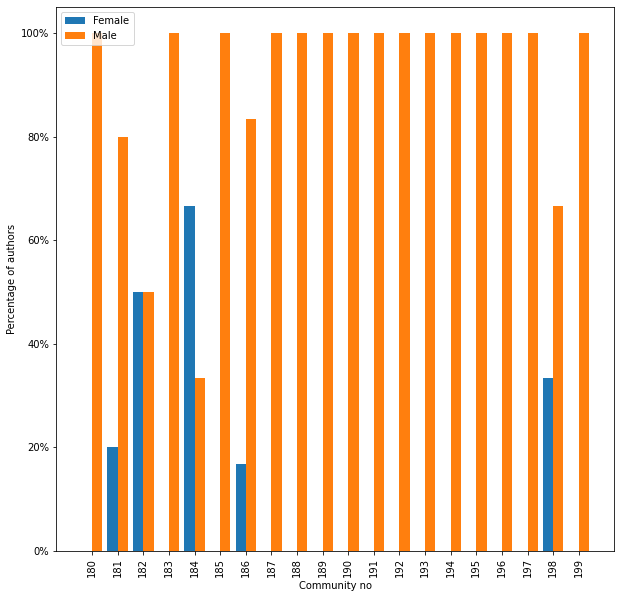

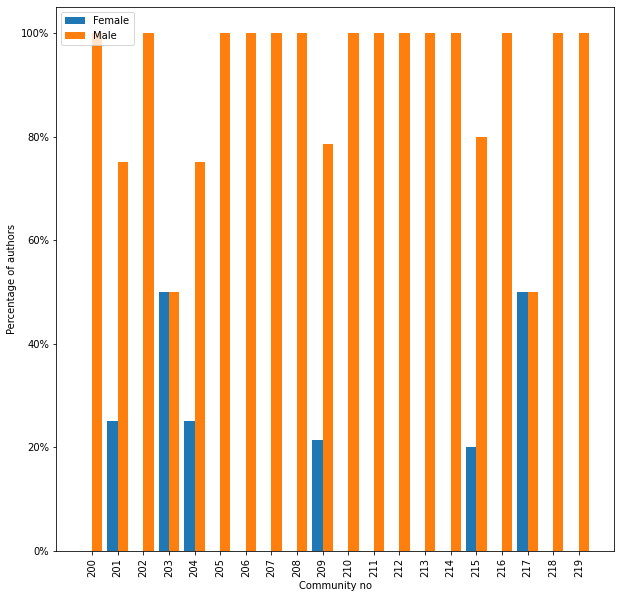

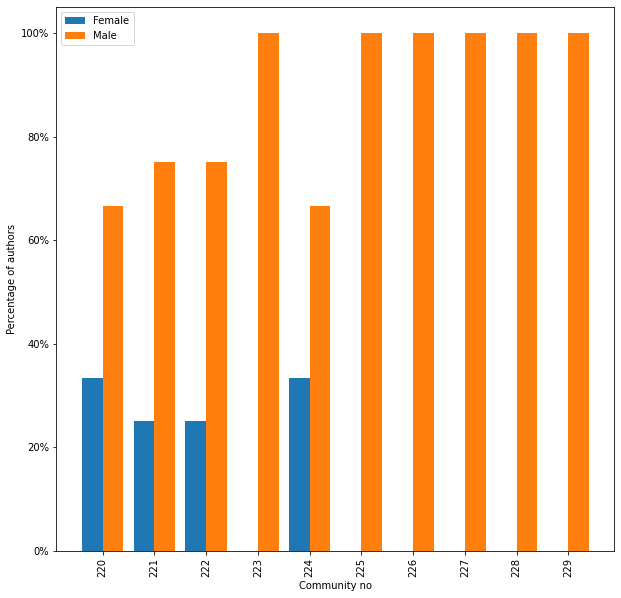

In [ ]:
import numpy as np 


for i in range(0,total_no_com,20):

    if i+20>total_no_com+1:
        offset = total_no_com +1 -i
    else:
        offset = 20
    X_axis = np.arange(i,i+offset)

    plt.figure(figsize=(10, 10))
    plt.bar(X_axis - 0.2, final_female_per[i:i+offset], 0.4, label = 'Female')
    plt.bar(X_axis + 0.2, final_male_per[i:i+offset], 0.4, label = 'Male')
    
    plt.xticks(X_axis, final_community_list[i:i+offset],rotation = 'vertical')
    plt.xlabel("Community no")
    plt.ylabel("Percentage of authors")
    # plt.title("Number of Students in each group")
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

    plt.legend()

    plt.show()

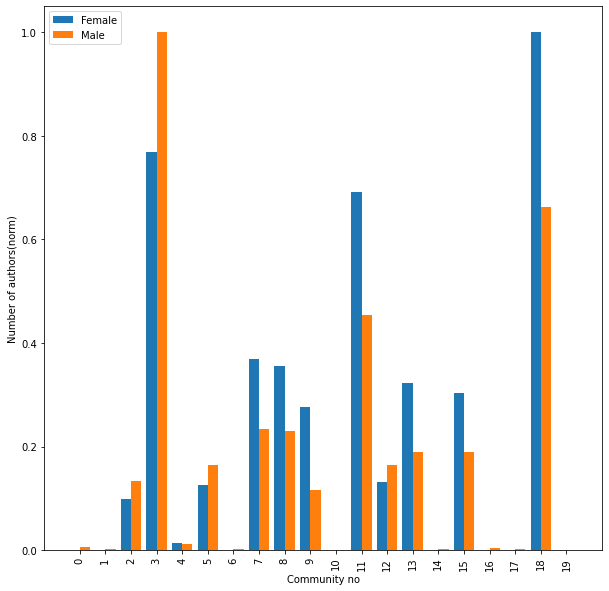

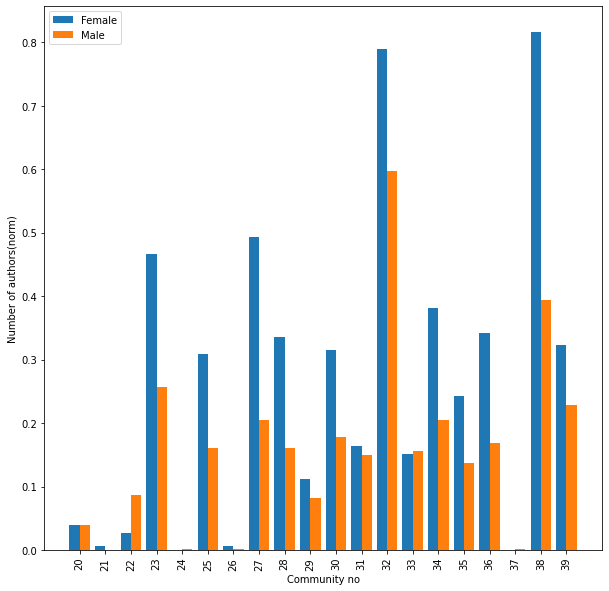

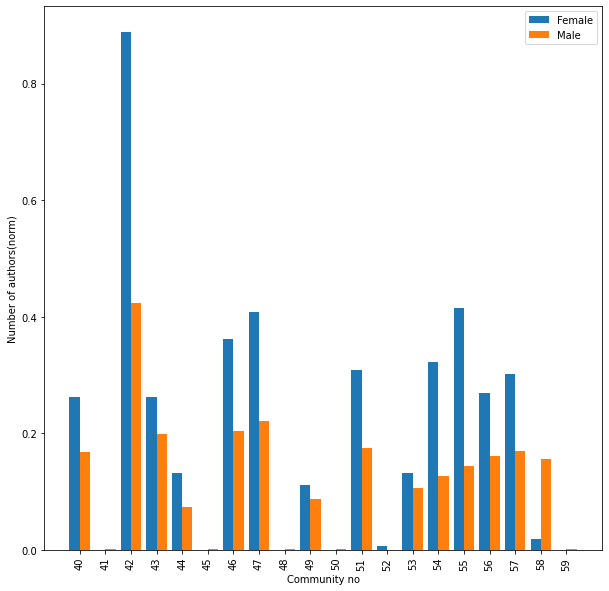

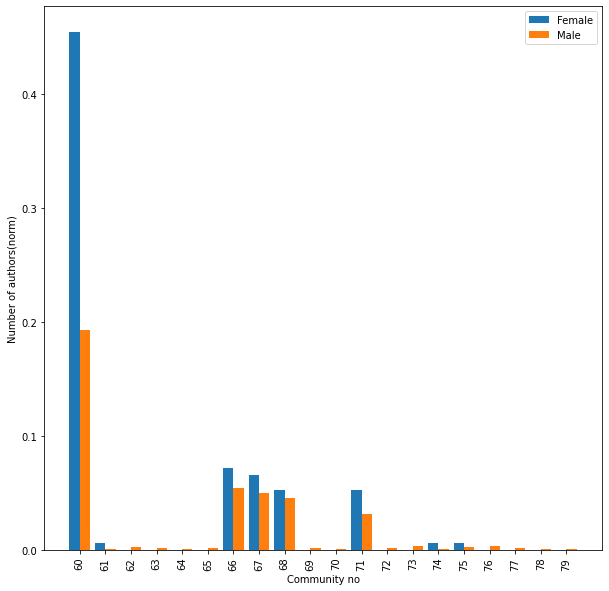

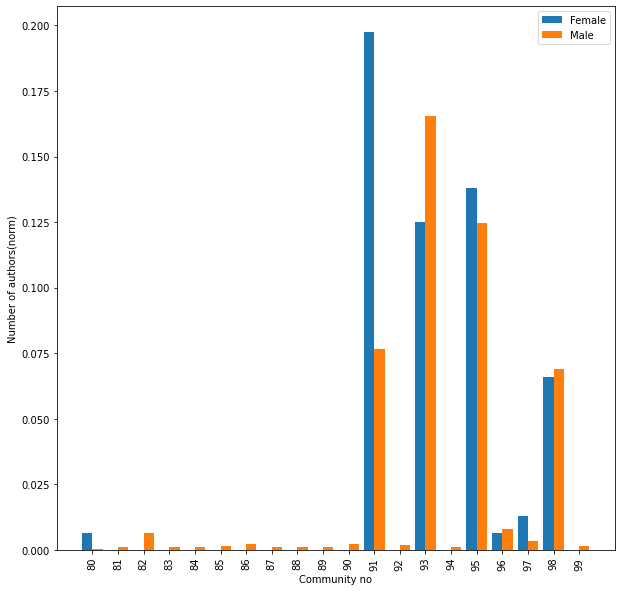

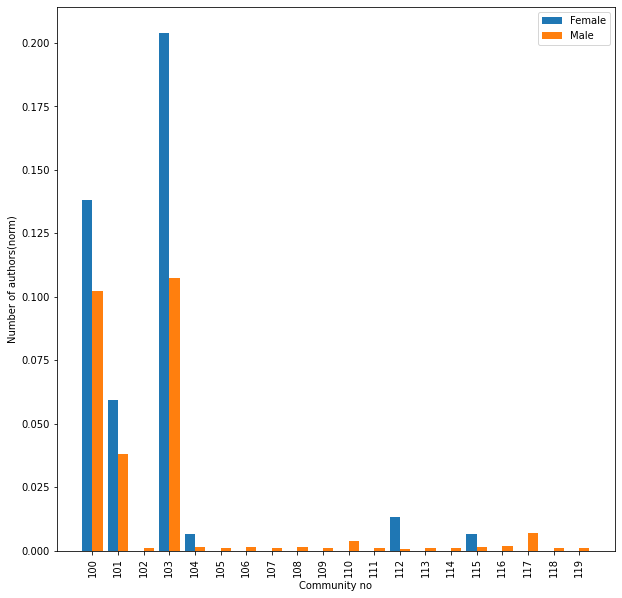

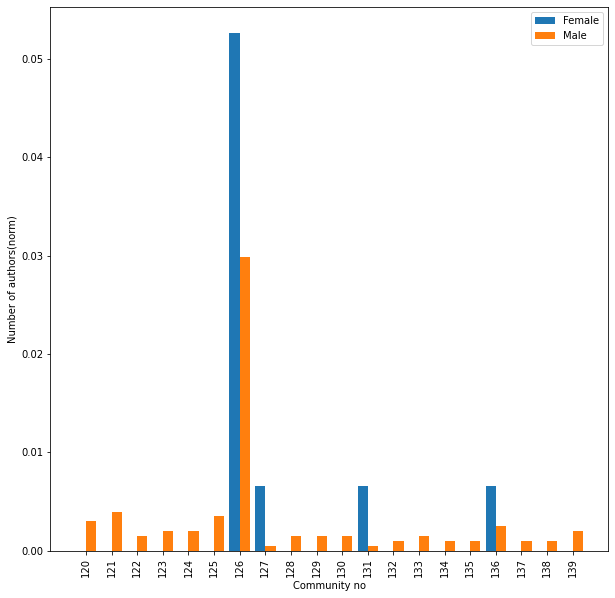

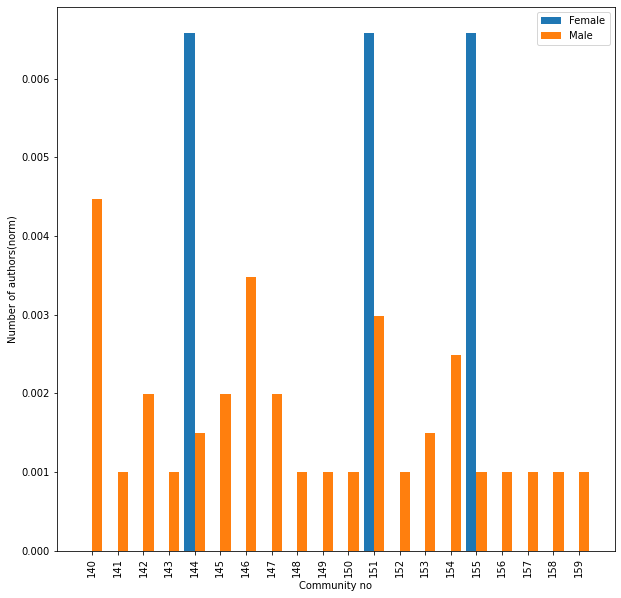

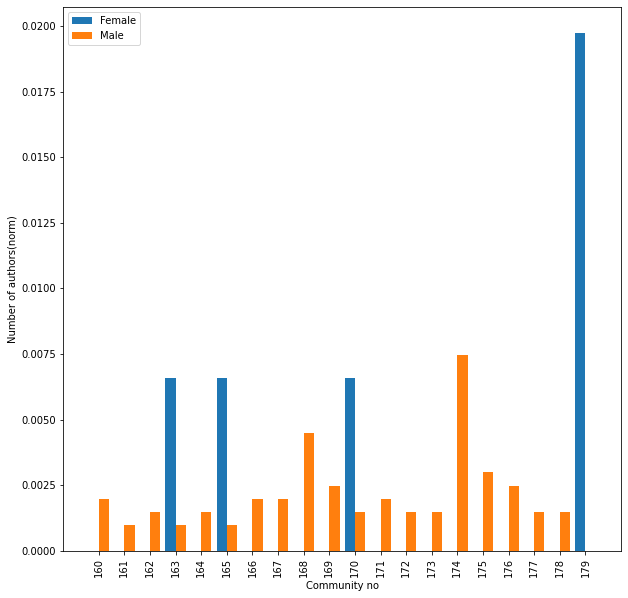

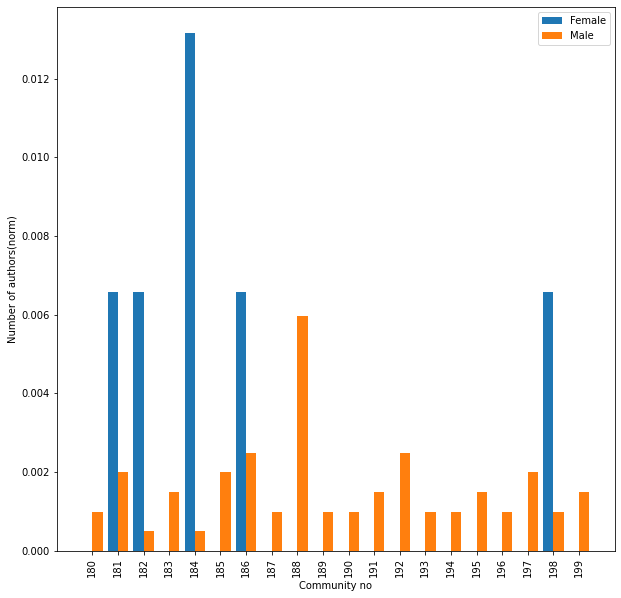

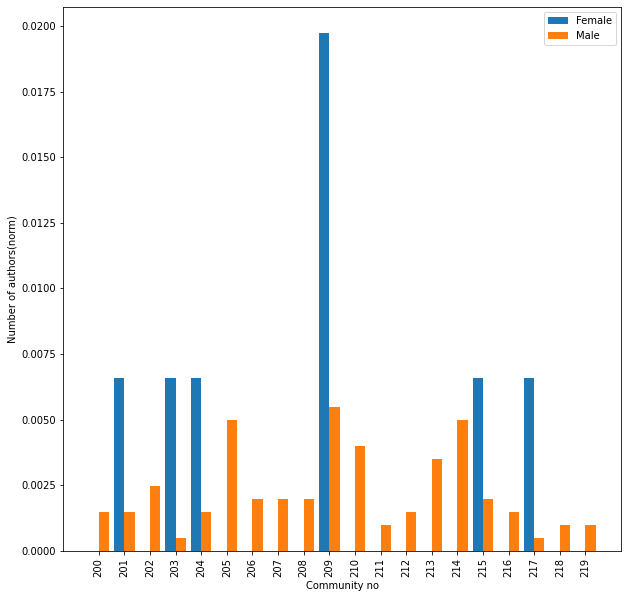

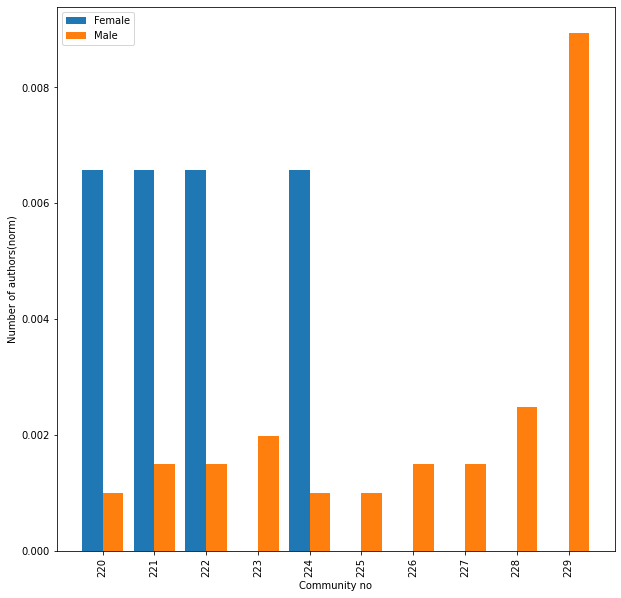

In [ ]:
import numpy as np 


for i in range(0,total_no_com,20):

    if i+20>total_no_com+1:
        offset = total_no_com +1 -i
    else:
        offset = 20
    X_axis = np.arange(i,i+offset)

    plt.figure(figsize=(10, 10))
    plt.bar(X_axis - 0.2, final_female_norm[i:i+offset], 0.4, label = 'Female')
    plt.bar(X_axis + 0.2, final_male_norm[i:i+offset], 0.4, label = 'Male')
    
    plt.xticks(X_axis, final_community_list[i:i+offset],rotation = 'vertical')
    plt.xlabel("Community no")
    plt.ylabel("Number of authors(norm)")
    # plt.title("Number of Students in each group")
    plt.legend()

    plt.show()

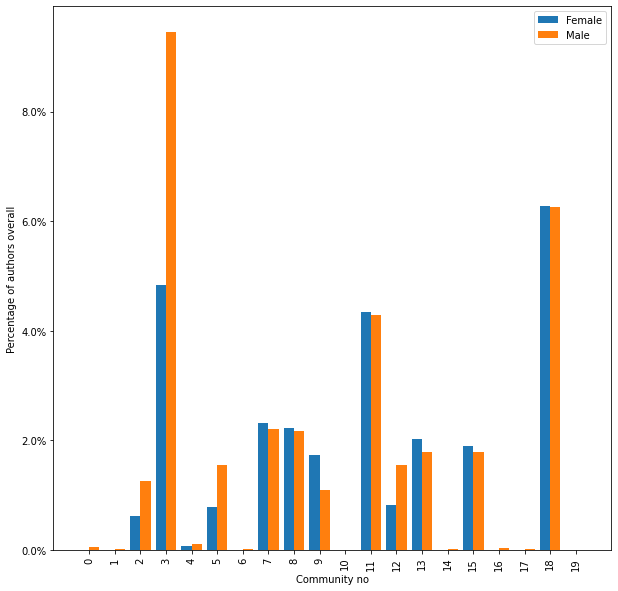

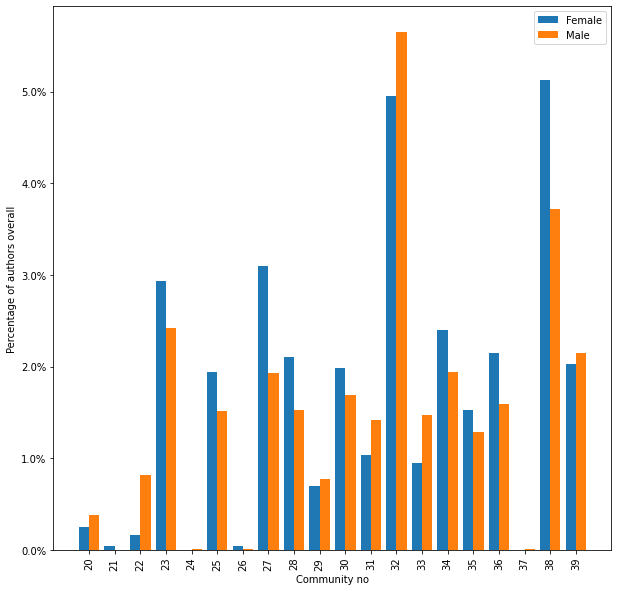

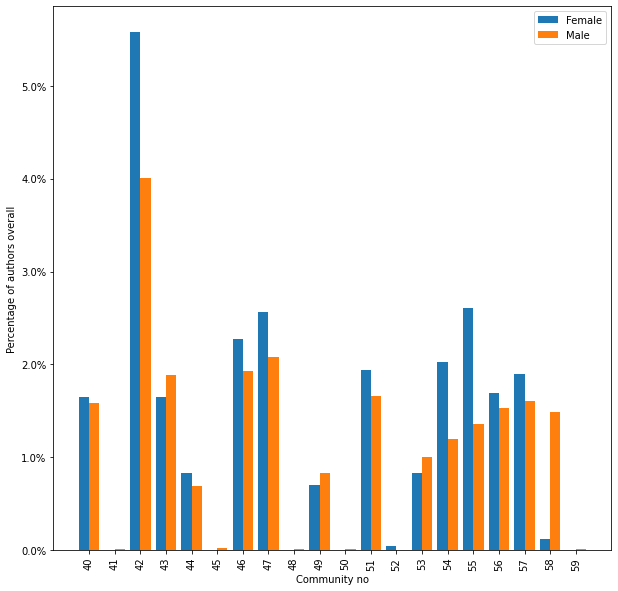

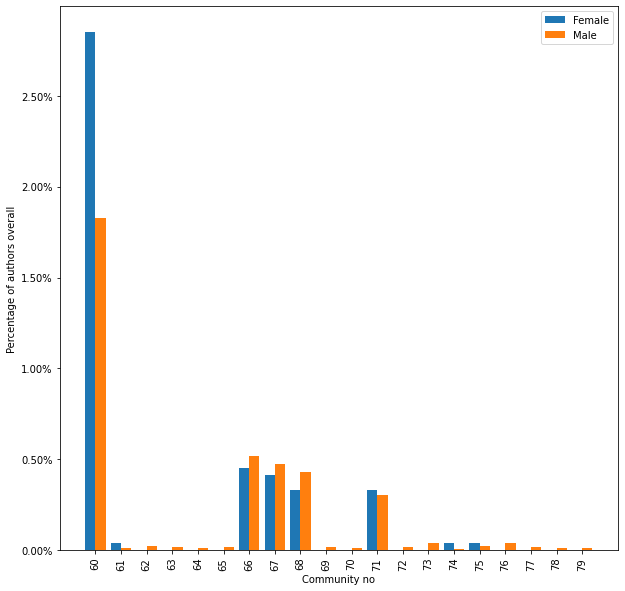

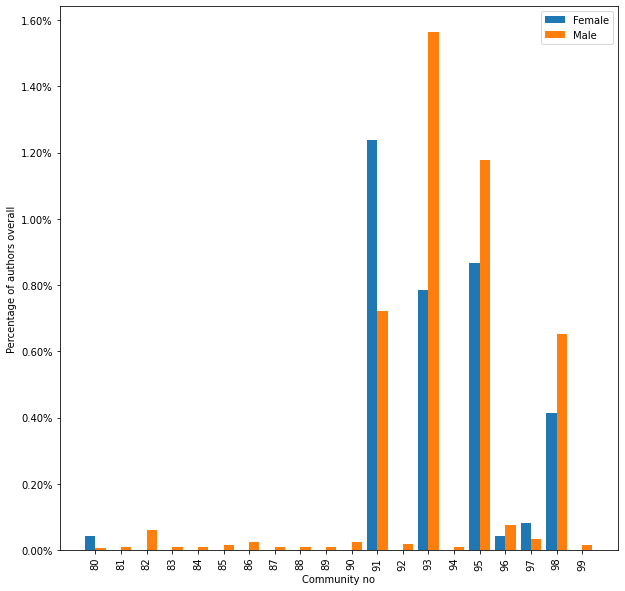

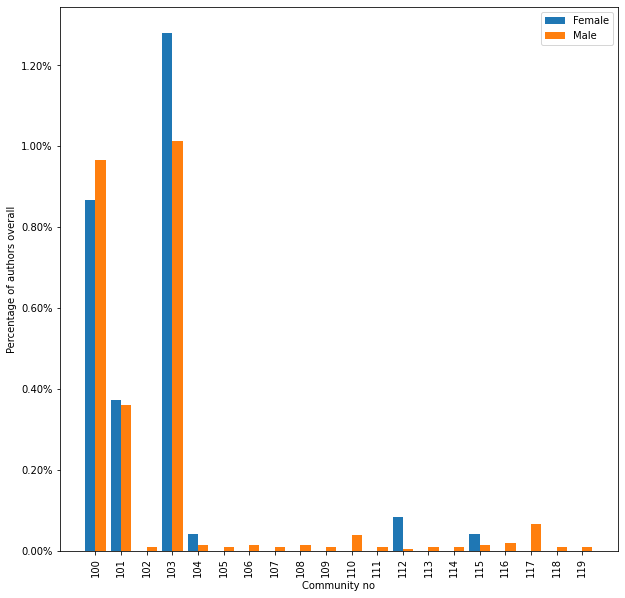

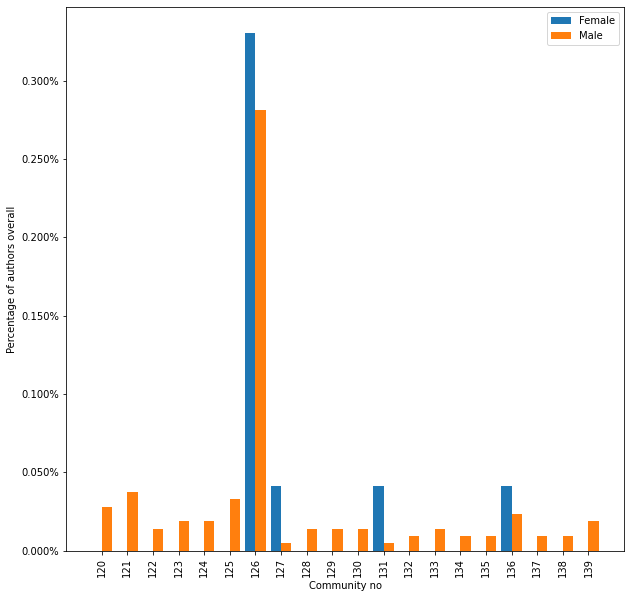

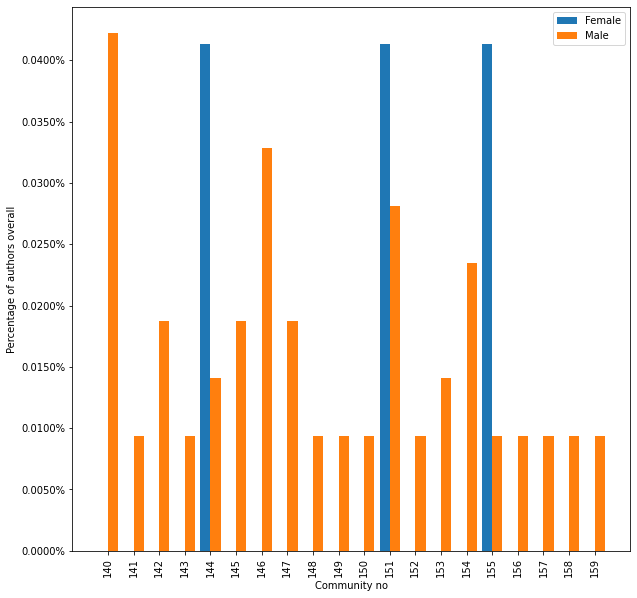

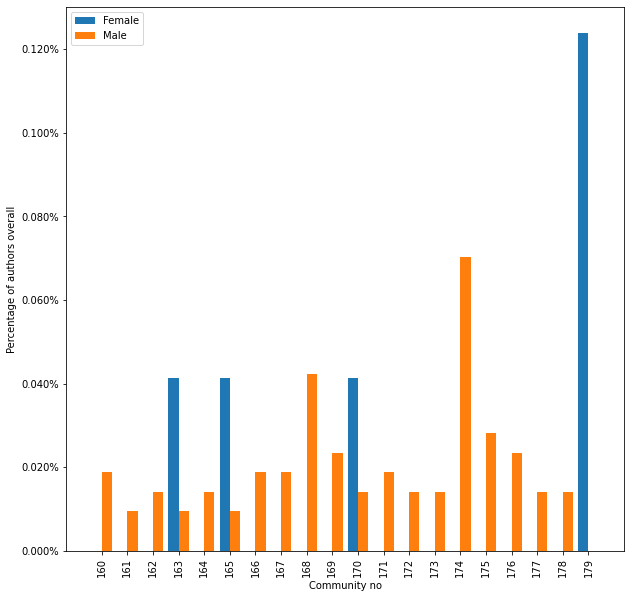

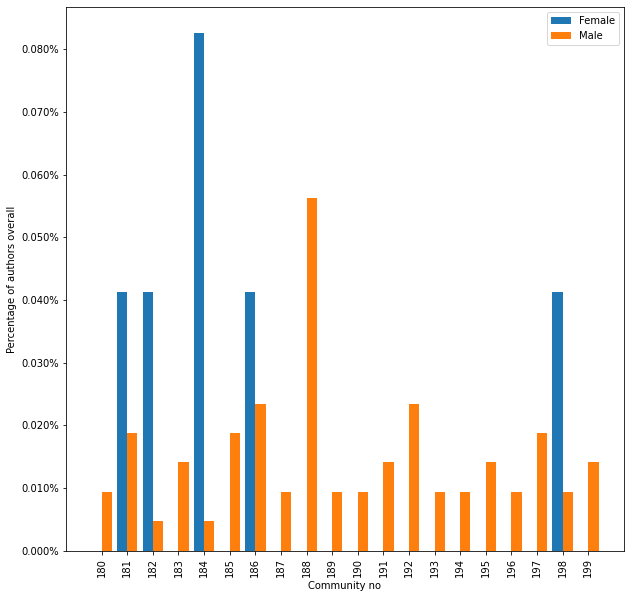

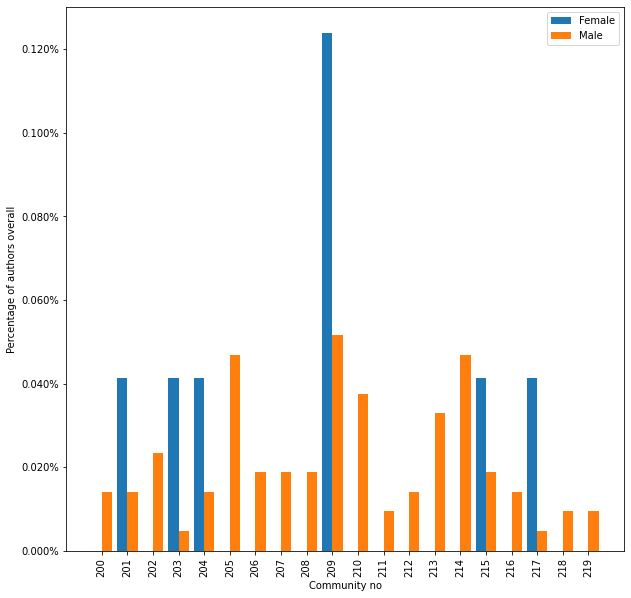

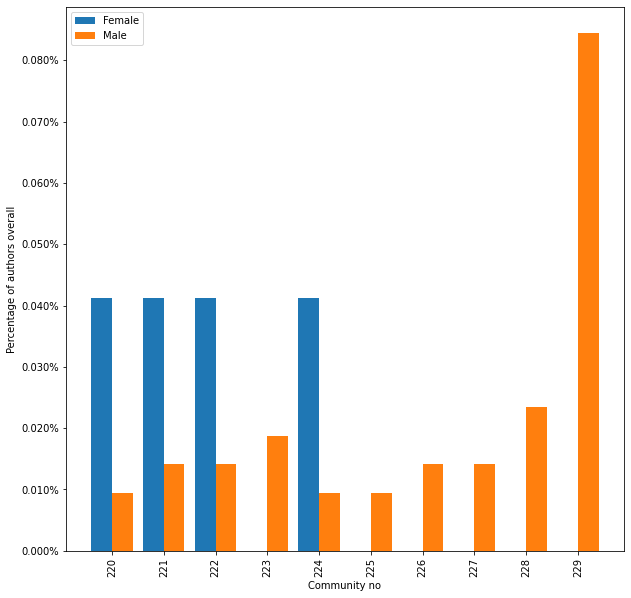

In [ ]:
import numpy as np 


for i in range(0,total_no_com,20):

    if i+20>total_no_com+1:
        offset = total_no_com +1 -i
    else:
        offset = 20
    X_axis = np.arange(i,i+offset)

    plt.figure(figsize=(10, 10))
    plt.bar(X_axis - 0.2, final_female_per_whole[i:i+offset], 0.4, label = 'Female')
    plt.bar(X_axis + 0.2, final_male_per_whole[i:i+offset], 0.4, label = 'Male')
    
    plt.xticks(X_axis, final_community_list[i:i+offset],rotation = 'vertical')
    plt.xlabel("Community no")
    plt.ylabel("Percentage of authors overall")
    # plt.title("Number of Students in each group")
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

    plt.legend()

    plt.show()

In [ ]:
print(final_female_norm)
print(final_female)
print(maxifemale)
print(maximale)
print(sum_male)
print(sum_female)

[0.0, 0.0, 0.08333333333333333, 0.7380952380952381, 0.011904761904761904, 0.125, 0.0, 0.38095238095238093, 0.30952380952380953, 0.2857142857142857, 0.0, 0.7023809523809523, 0.10714285714285714, 0.35119047619047616, 0.0, 0.27976190476190477, 0.0, 0.0, 1.0, 0.0, 0.047619047619047616, 0.005952380952380952, 0.02976190476190476, 0.4523809523809524, 0.0, 0.3273809523809524, 0.0, 0.4523809523809524, 0.27380952380952384, 0.08928571428571429, 0.2857142857142857, 0.16666666666666666, 0.7916666666666666, 0.14285714285714285, 0.3869047619047619, 0.24404761904761904, 0.3630952380952381, 0.0, 0.7380952380952381, 0.2916666666666667, 0.2261904761904762, 0.0, 0.8511904761904762, 0.20833333333333334, 0.125, 0.0, 0.39285714285714285, 0.40476190476190477, 0.0, 0.10119047619047619, 0.0, 0.32142857142857145, 0.0, 0.13690476190476192, 0.3333333333333333, 0.375, 0.25, 0.25595238095238093, 0.017857142857142856, 0.0, 0.39285714285714285, 0.005952380952380952, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142, 0.059523809

In [ ]:
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.savefig('communitites.png')

NameError: ignored

In [ ]:
eig = nx.eigenvector_centrality(G)

Eigenvector CENTRALITY FEMALES


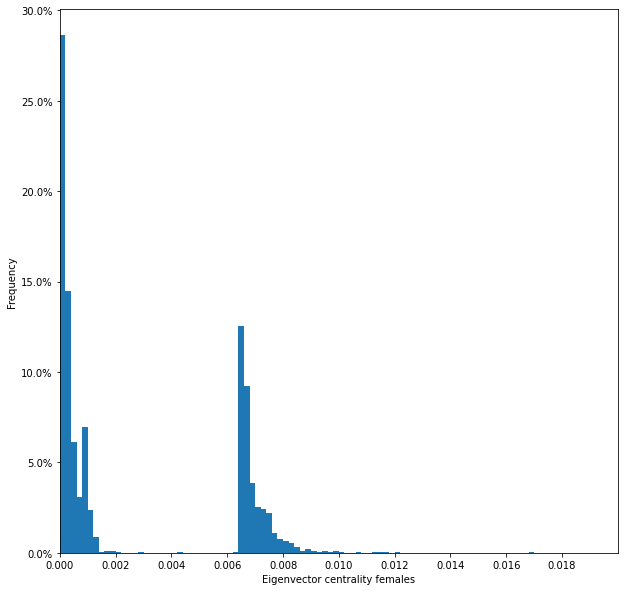

In [ ]:
# from matplotlib.ticker import PercentFormatter
# import numpy as np
# from matplotlib import pyplot as plt
min_val = 100000
max_val=-1
sum=0
male_centralities=[]
female_centralities=[]
for node in eig:
  if G.nodes[node]["gender"]=="female":
    female_centralities.append(eig[node])
  else:
    male_centralities.append(eig[node])

# avg_val=sum/len(eig)
# male_centralities = [i/len(male_centralities) for i in male_centralities]
# female_centralities = [i/len(female_centralities) for i in female_centralities]
print("Eigenvector CENTRALITY FEMALES")
fig,ax = plt.subplots(figsize=(10,10))
plt.xlabel("Eigenvector centrality females")
plt.ylabel("Frequency")
ax.hist(female_centralities, bins=np.arange(0,0.02,0.0002), weights=np.ones(len(female_centralities)) / len(female_centralities))
start, end = ax.get_ylim()
ax.set_xlim(0,0.02)
# print(start,end)
ax.yaxis.set_ticks(np.arange(start, end, 0.05)) # put start end here to get cropped graph(zoomed in)
ax.xaxis.set_ticks(np.arange(0,0.02,0.002))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()




Eigenvector CENTRALITY MALES


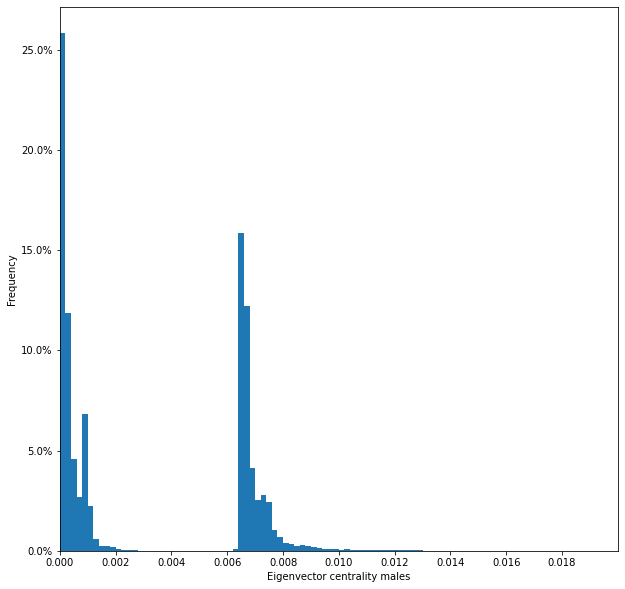

In [ ]:
print("Eigenvector CENTRALITY MALES")
fig,ax = plt.subplots(figsize=(10,10))
plt.xlabel("Eigenvector centrality males")
plt.ylabel("Frequency")
ax.hist(male_centralities, bins=np.arange(0,0.02,0.0002), weights=np.ones(len(male_centralities)) / len(male_centralities))
start, end = ax.get_ylim()
ax.set_xlim(0,0.02)
# print(start,end)
ax.yaxis.set_ticks(np.arange(start, end, 0.05)) # put start, end to get zoomed in graph
ax.xaxis.set_ticks(np.arange(0,0.02,0.002))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [ ]:
femali_avg_clustering = np.mean(female_centralities)
mali_avg_clustering = np.mean(male_centralities)
print(femali_avg_clustering, mali_avg_clustering)